### Импорт библиотек

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

### Получение данных

In [2]:
# Define the list of tickers for the Dow Jones companies
tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']

# Fetch the data for the tickers from Yahoo Finance
data = yf.download(tickers, start='2000-01-01', end='2023-01-01')

# Save the data as a pickle file
data.to_pickle('dow_jones_data.pkl')

# Load the data from the pickle file
data = pd.read_pickle('dow_jones_data.pkl')

[*********************100%%**********************]  30 of 30 completed


## Разведочный анализ данных

#### 1. Изучение особенностей данных

Рассчитаем основные статистики для вещественных и категориальных признаков

In [3]:
data.head()

Adj Close                                                  \
                AAPL       AMGN        AXP         BA        CAT CRM   
Date                                                                   
2000-01-03  0.848323  45.956356  33.063007  25.940275  12.968652 NaN   
2000-01-04  0.776801  42.442322  31.814592  25.899946  12.801957 NaN   
2000-01-05  0.788168  43.902683  31.006538  27.513645  13.102004 NaN   
2000-01-06  0.719961  44.632874  31.638239  27.796047  13.768764 NaN   
2000-01-07  0.754065  49.652943  32.098866  28.602890  14.218832 NaN   

                                                 ...    Volume            \
                 CSCO        CVX        DIS DOW  ...       MRK      MSFT   
Date                                             ...                       
2000-01-03  37.228065  17.508465  23.115257 NaN  ...   6265782  53228400   
2000-01-04  35.139503  17.508465  24.469282 NaN  ...   7894689  54119000   
2000-01-05  35.031830  17.822512  25.484808 NaN  ...   7963018  64059600   
2000-01-06  34.450489  18.581478  24.469282 NaN  ...   4989004  54976600   
2000-01-07  36.474461  18.908621  24.082418 NaN  ...  10871218  62013600   

                                                                               
                NKE       PG     TRV       UNH   V       VZ      WBA      WMT  
Date                                                                           
2000-01-03  8014400  4275000  336400   3431200 NaN  4663843  2095900  8369900  
2000-01-04  9810400  4270800  494400   5997600 NaN  5005878  1709100  6745100  
2000-01-05  6542400  5098400  736000  10562400 NaN  6368681  2167800  7018700  
2000-01-06  4891200  6524200  660400  15300000 NaN  4705763  2595400  6544500  
2000-01-07  3993600  9832000  594700  16160800 NaN  5043907  3629900  7976900  

[5 rows x 180 columns]

In [4]:
columns = data.columns.tolist();columns

[('Adj Close', 'AAPL'),
 ('Adj Close', 'AMGN'),
 ('Adj Close', 'AXP'),
 ('Adj Close', 'BA'),
 ('Adj Close', 'CAT'),
 ('Adj Close', 'CRM'),
 ('Adj Close', 'CSCO'),
 ('Adj Close', 'CVX'),
 ('Adj Close', 'DIS'),
 ('Adj Close', 'DOW'),
 ('Adj Close', 'GS'),
 ('Adj Close', 'HD'),
 ('Adj Close', 'HON'),
 ('Adj Close', 'IBM'),
 ('Adj Close', 'INTC'),
 ('Adj Close', 'JNJ'),
 ('Adj Close', 'JPM'),
 ('Adj Close', 'KO'),
 ('Adj Close', 'MCD'),
 ('Adj Close', 'MMM'),
 ('Adj Close', 'MRK'),
 ('Adj Close', 'MSFT'),
 ('Adj Close', 'NKE'),
 ('Adj Close', 'PG'),
 ('Adj Close', 'TRV'),
 ('Adj Close', 'UNH'),
 ('Adj Close', 'V'),
 ('Adj Close', 'VZ'),
 ('Adj Close', 'WBA'),
 ('Adj Close', 'WMT'),
 ('Close', 'AAPL'),
 ('Close', 'AMGN'),
 ('Close', 'AXP'),
 ('Close', 'BA'),
 ('Close', 'CAT'),
 ('Close', 'CRM'),
 ('Close', 'CSCO'),
 ('Close', 'CVX'),
 ('Close', 'DIS'),
 ('Close', 'DOW'),
 ('Close', 'GS'),
 ('Close', 'HD'),
 ('Close', 'HON'),
 ('Close', 'IBM'),
 ('Close', 'INTC'),
 ('Close', 'JNJ'),
 ('Close

In [5]:
#Описательная статистика:
data["Adj Close"].describe(include="all")

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
count,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,4665.000000,5787.000000,5787.000000,5787.000000,955.000000,...,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,3724.000000,5787.000000,5787.000000,5787.000000
mean,28.648579,93.263540,60.700332,108.707767,69.659159,75.361310,23.200709,59.565746,61.282694,46.464485,...,36.992598,61.771657,37.986884,57.814125,64.982335,110.272403,89.588283,25.589759,35.369486,60.167150
std,42.850517,65.084422,38.897701,96.062334,53.622953,73.545627,12.861729,33.863206,46.822049,9.212750,...,20.125525,76.545877,40.084018,34.502072,44.447480,130.873232,71.667056,12.734546,15.239957,33.353999
min,0.198861,22.687012,8.134099,16.991476,8.235742,2.397500,5.925484,14.258603,10.841541,18.409842,...,12.106308,11.327569,2.577922,14.294938,11.923715,4.820429,9.551765,8.840085,14.126884,28.398066
25%,1.587098,42.477242,33.347721,39.974413,27.955029,14.092500,13.389267,29.664104,23.053467,39.824335,...,21.950113,18.956079,8.380184,32.958164,27.965414,24.727575,21.833142,14.220474,23.382795,35.739372
50%,10.828218,52.938797,45.197811,62.011215,59.176060,50.430000,17.624870,59.757748,34.300621,47.087772,...,29.041956,22.923225,18.788324,44.768627,43.036652,44.472355,66.483017,20.196184,29.140408,42.081871
75%,33.181690,138.796463,78.521698,139.031120,84.161400,126.730003,34.627340,81.221821,99.728313,53.957289,...,47.587772,60.225094,54.524525,70.634567,100.897903,152.582062,153.278587,35.539179,45.830828,69.751938
max,180.190964,282.868958,193.470062,430.299988,238.262344,309.959991,60.169132,181.433914,201.910004,65.409111,...,109.857956,337.621124,173.653580,157.220627,187.232483,547.095398,246.838394,52.166176,73.572899,156.208832


In [6]:
data.describe(include="all")

Adj Close                                                      \
              AAPL         AMGN          AXP           BA          CAT   
count  5787.000000  5787.000000  5787.000000  5787.000000  5787.000000   
mean     28.648579    93.263540    60.700332   108.707767    69.659159   
std      42.850517    65.084422    38.897701    96.062334    53.622953   
min       0.198861    22.687012     8.134099    16.991476     8.235742   
25%       1.587098    42.477242    33.347721    39.974413    27.955029   
50%      10.828218    52.938797    45.197811    62.011215    59.176060   
75%      33.181690   138.796463    78.521698   139.031120    84.161400   
max     180.190964   282.868958   193.470062   430.299988   238.262344   

                                                                       ...  \
               CRM         CSCO          CVX          DIS         DOW  ...   
count  4665.000000  5787.000000  5787.000000  5787.000000  955.000000  ...   
mean     75.361310    23.200709    59.565746    61.282694   46.464485  ...   
std      73.545627    12.861729    33.863206    46.822049    9.212750  ...   
min       2.397500     5.925484    14.258603    10.841541   18.409842  ...   
25%      14.092500    13.389267    29.664104    23.053467   39.824335  ...   
50%      50.430000    17.624870    59.757748    34.300621   47.087772  ...   
75%     126.730003    34.627340    81.221821    99.728313   53.957289  ...   
max     309.959991    60.169132   181.433914   201.910004   65.409111  ...   

             Volume                                                          \
                MRK          MSFT           NKE            PG           TRV   
count  5.787000e+03  5.787000e+03  5.787000e+03  5.787000e+03  5.787000e+03   
mean   1.188331e+07  5.223922e+07  1.048008e+07  9.231718e+06  2.358908e+06   
std    7.626356e+06  3.091925e+07  6.760932e+06  5.753462e+06  1.739881e+06   
min    1.982921e+06  7.425600e+06  1.821900e+06  1.030400e+06  2.677000e+05   
25%    7.439752e+06  2.973235e+07  6.442050e+06  6.217100e+06  1.241950e+06   
50%    1.022858e+07  4.725520e+07  8.809000e+06  7.927500e+06  1.821100e+06   
75%    1.405557e+07  6.585185e+07  1.249775e+07  1.055505e+07  2.887900e+06   
max    1.519762e+08  5.910522e+08  9.776080e+07  1.372872e+08  2.782020e+07   

                                                                             
                UNH             V            VZ           WBA           WMT  
count  5.787000e+03  3.724000e+03  5.787000e+03  5.787000e+03  5.787000e+03  
mean   6.438673e+06  1.557642e+07  1.417301e+07  5.530350e+06  1.072334e+07  
std    4.450609e+06  2.059477e+07  1.132234e+07  3.817961e+06  6.651879e+06  
min    7.140000e+05  1.993500e+06  1.363804e+06  5.700000e+05  2.031400e+06  
25%    3.384400e+06  7.153200e+06  8.879250e+06  3.220150e+06  6.545950e+06  
50%    5.266200e+06  1.014600e+07  1.269710e+07  4.774700e+06  8.732500e+06  
75%    8.037400e+06  1.655410e+07  1.731670e+07  6.781700e+06  1.272480e+07  
max    5.680120e+07  7.084860e+08  6.166205e+08  8.413010e+07  9.678680e+07  

[8 rows x 180 columns]

Заметим, что у нас есть пропущенные данные. Найдем их расположение и рассчитаем долю пропущенных значений

In [7]:
# Подсчитать пропущенные значения в каждом столбце
missing_counts = data.isna().sum()
# Рассчитать долю пропущенных значений в каждом столбце
missing_props = missing_counts / len(data)
# Выбрать только столбцы с пропущенными значениями
missing_cols = missing_props.loc[missing_props > 0]
# Печать
print(missing_cols)

Adj Close  CRM    0.193883
           DOW    0.834975
           V      0.356489
Close      CRM    0.193883
           DOW    0.834975
           V      0.356489
High       CRM    0.193883
           DOW    0.834975
           V      0.356489
Low        CRM    0.193883
           DOW    0.834975
           V      0.356489
Open       CRM    0.193883
           DOW    0.834975
           V      0.356489
Volume     CRM    0.193883
           DOW    0.834975
           V      0.356489
dtype: float64


Видим пропущенные значения для тикеров CRM, DOW, V. Причина данных пропущенных значений заключается в том, что данные тикеры просто не торговались в определенный промежуток исследования. Например для компании DOW:
"Dow common stock will begin trading on the New York Stock Exchange (NYSE) under its historical symbol “DOW” on April 2, 2019, and will join the Dow Jones Industrial Average (DJIA) index."

Так как доля пропущенных значений в них существенна, целесообразно не пытаться заполнить пропущенные значения, а удалить данные тикеры из исследования

In [8]:
data = data.drop(columns=[('Adj Close', 'CRM'), ('Adj Close', 'DOW'), ('Adj Close', 'V'), ('Close', 'CRM'), ('Close', 'DOW'), ('Close', 'V'), ('High', 'CRM'), ('High', 'DOW'), ('High', 'V'), ('Low', 'CRM'), ('Low', 'DOW'), ('Low', 'V'), ('Open', 'CRM'), ('Open', 'DOW'), ('Open', 'V'), ('Volume', 'CRM'), ('Volume', 'DOW'), ('Volume', 'V')])

In [9]:
data.describe(include="all")

Adj Close                                                      \
              AAPL         AMGN          AXP           BA          CAT   
count  5787.000000  5787.000000  5787.000000  5787.000000  5787.000000   
mean     28.648579    93.263540    60.700332   108.707767    69.659159   
std      42.850517    65.084422    38.897701    96.062334    53.622953   
min       0.198861    22.687012     8.134099    16.991476     8.235742   
25%       1.587098    42.477242    33.347721    39.974413    27.955029   
50%      10.828218    52.938797    45.197811    62.011215    59.176060   
75%      33.181690   138.796463    78.521698   139.031120    84.161400   
max     180.190964   282.868958   193.470062   430.299988   238.262344   

                                                                        ...  \
              CSCO          CVX          DIS           GS           HD  ...   
count  5787.000000  5787.000000  5787.000000  5787.000000  5787.000000  ...   
mean     23.200709    59.565746    61.282694   143.325571    86.362335  ...   
std      12.861729    33.863206    46.822049    75.788310    90.742730  ...   
min       5.925484    14.258603    10.841541    40.852062    12.502982  ...   
25%      13.389267    29.664104    23.053467    80.710640    23.604607  ...   
50%      17.624870    59.757748    34.300621   132.583786    32.751938  ...   
75%      34.627340    81.221821    99.728313   177.222855   126.062138  ...   
max      60.169132   181.433914   201.910004   401.437286   397.627716  ...   

             Volume                                                          \
                MMM           MRK          MSFT           NKE            PG   
count  5.787000e+03  5.787000e+03  5.787000e+03  5.787000e+03  5.787000e+03   
mean   3.406661e+06  1.188331e+07  5.223922e+07  1.048008e+07  9.231718e+06   
std    2.337573e+06  7.626356e+06  3.091925e+07  6.760932e+06  5.753462e+06   
min    6.510000e+05  1.982921e+06  7.425600e+06  1.821900e+06  1.030400e+06   
25%    2.171200e+06  7.439752e+06  2.973235e+07  6.442050e+06  6.217100e+06   
50%    2.872400e+06  1.022858e+07  4.725520e+07  8.809000e+06  7.927500e+06   
75%    3.946100e+06  1.405557e+07  6.585185e+07  1.249775e+07  1.055505e+07   
max    5.053240e+07  1.519762e+08  5.910522e+08  9.776080e+07  1.372872e+08   

                                                                             
                TRV           UNH            VZ           WBA           WMT  
count  5.787000e+03  5.787000e+03  5.787000e+03  5.787000e+03  5.787000e+03  
mean   2.358908e+06  6.438673e+06  1.417301e+07  5.530350e+06  1.072334e+07  
std    1.739881e+06  4.450609e+06  1.132234e+07  3.817961e+06  6.651879e+06  
min    2.677000e+05  7.140000e+05  1.363804e+06  5.700000e+05  2.031400e+06  
25%    1.241950e+06  3.384400e+06  8.879250e+06  3.220150e+06  6.545950e+06  
50%    1.821100e+06  5.266200e+06  1.269710e+07  4.774700e+06  8.732500e+06  
75%    2.887900e+06  8.037400e+06  1.731670e+07  6.781700e+06  1.272480e+07  
max    2.782020e+07  5.680120e+07  6.166205e+08  8.413010e+07  9.678680e+07  

[8 rows x 162 columns]

Далее будем искать нулевые значения данных

In [10]:
# Count the number of missing values in each column
zeros_count = (data == 0).sum()
# Print the result
print(sum(zeros_count))

0


Нулевых значений нет

#### 2. Обработка данных

Переведем наши данные в лог. формат

In [11]:
data_log = np.log(data)
data_log.head()

Adj Close                                                    \
                AAPL      AMGN       AXP        BA       CAT      CSCO   
Date                                                                     
2000-01-03 -0.164494  3.827692  3.498415  3.255797  2.562535  3.617063   
2000-01-04 -0.252571  3.748146  3.459925  3.254241  2.549598  3.559326   
2000-01-05 -0.238044  3.781975  3.434198  3.314682  2.572765  3.556257   
2000-01-06 -0.328558  3.798471  3.454366  3.324894  2.622403  3.539523   
2000-01-07 -0.282277  3.905058  3.468821  3.353508  2.654567  3.596612   

                                                    ...     Volume             \
                 CVX       DIS        GS        HD  ...        MMM        MRK   
Date                                                ...                         
2000-01-03  2.862684  3.140493  4.169065  3.690959  ...  14.591803  15.650614   
2000-01-04  2.862684  3.197419  4.104008  3.636785  ...  14.813860  15.881701   
2000-01-05  2.880462  3.238083  4.056048  3.656826  ...  15.123681  15.890319   
2000-01-06  2.922165  3.197419  4.097947  3.608036  ...  15.603229  15.422747   
2000-01-07  2.939618  3.181482  4.101739  3.664731  ...  15.226790  16.201629   

                                                                              \
                 MSFT        NKE         PG        TRV        UNH         VZ   
Date                                                                           
2000-01-03  17.790103  15.896750  15.268295  12.726056  15.048421  15.355350   
2000-01-04  17.806696  16.098954  15.267312  13.111100  15.606870  15.426123   
2000-01-05  17.975324  15.693815  15.444437  13.508985  16.172811  15.666903   
2000-01-06  17.822418  15.402948  15.691029  13.400601  16.543363  15.364298   
2000-01-07  17.942864  15.200204  16.101153  13.295812  16.598099  15.433692   

                                  
                  WBA        WMT  
Date                              
2000-01-03  14.555494  15.940152  
2000-01-04  14.351477  15.724327  
2000-01-05  14.589223  15.764089  
2000-01-06  14.769251  15.694136  
2000-01-07  15.104716  15.892060  

[5 rows x 162 columns]

Рассчитаем и добавим логдоходности

In [12]:
# Вычисляем логарифмический доход для каждой строки в столбце Adj Close
log_returns = data['Adj Close'] - data['Adj Close'].shift(1)
#Удаляем первую строчку из датафреймов
log_returns = log_returns.iloc[1:]
data_log = data_log.iloc[1:]

In [13]:
log_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5786 entries, 2000-01-04 to 2022-12-30
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5786 non-null   float64
 1   AMGN    5786 non-null   float64
 2   AXP     5786 non-null   float64
 3   BA      5786 non-null   float64
 4   CAT     5786 non-null   float64
 5   CSCO    5786 non-null   float64
 6   CVX     5786 non-null   float64
 7   DIS     5786 non-null   float64
 8   GS      5786 non-null   float64
 9   HD      5786 non-null   float64
 10  HON     5786 non-null   float64
 11  IBM     5786 non-null   float64
 12  INTC    5786 non-null   float64
 13  JNJ     5786 non-null   float64
 14  JPM     5786 non-null   float64
 15  KO      5786 non-null   float64
 16  MCD     5786 non-null   float64
 17  MMM     5786 non-null   float64
 18  MRK     5786 non-null   float64
 19  MSFT    5786 non-null   float64
 20  NKE     5786 non-null   float64
 21  PG      5786 non-nu

In [14]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5786 entries, 2000-01-04 to 2022-12-30
Columns: 162 entries, ('Adj Close', 'AAPL') to ('Volume', 'WMT')
dtypes: float64(162)
memory usage: 7.2 MB


#### 3. Изучение особенностей поведения каждого из признаков

Построим график зависимости стоимости акций от времени по нелогарифмическим данным

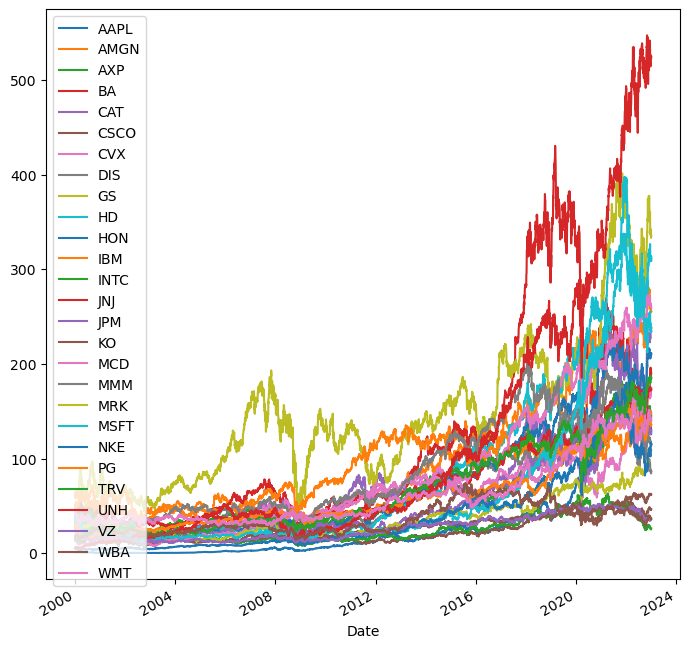

In [15]:
# Create a histogram of the "Adj Close" column
data["Adj Close"].plot(figsize=(7,7))

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

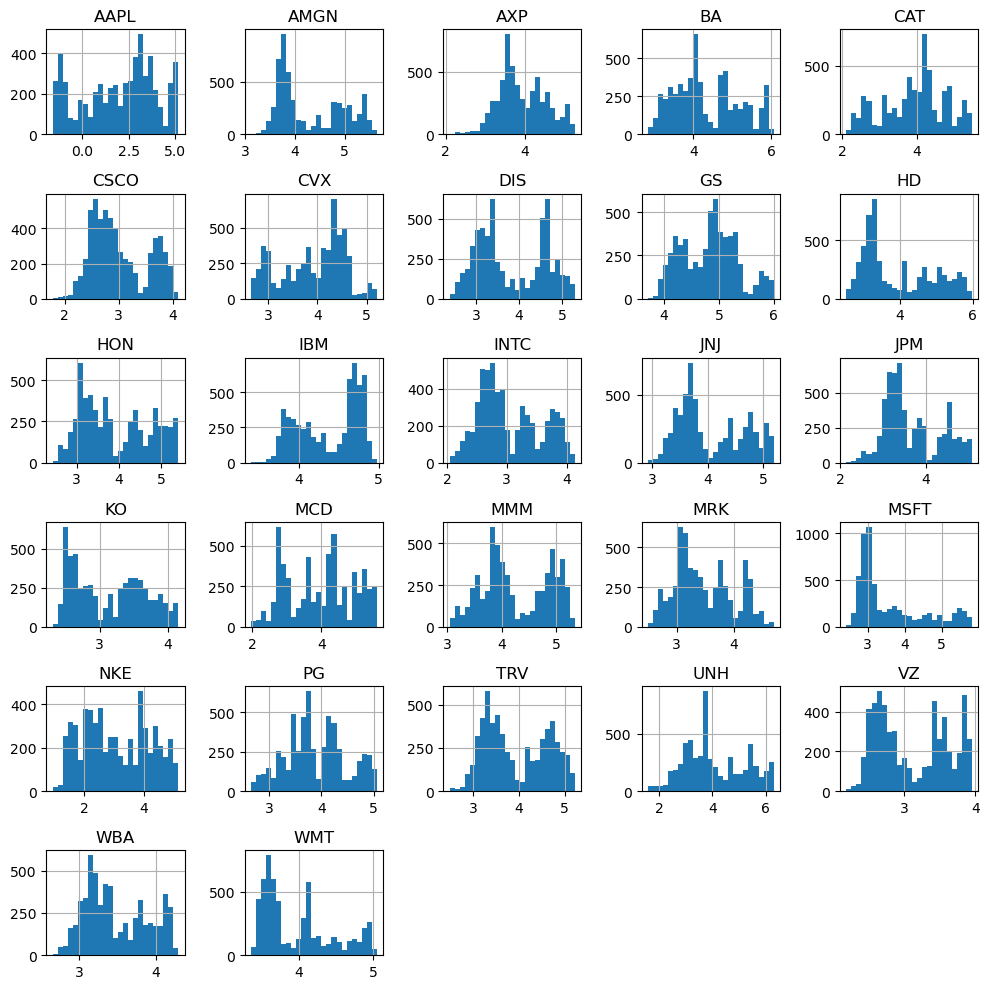

In [16]:
# Гистограмма столбца «Adj Close».
data_log["Adj Close"].hist(bins=25, figsize=(10,10))

# Отрегулируйте расстояние между подграфиками
plt.tight_layout()

# Результат
plt.show()

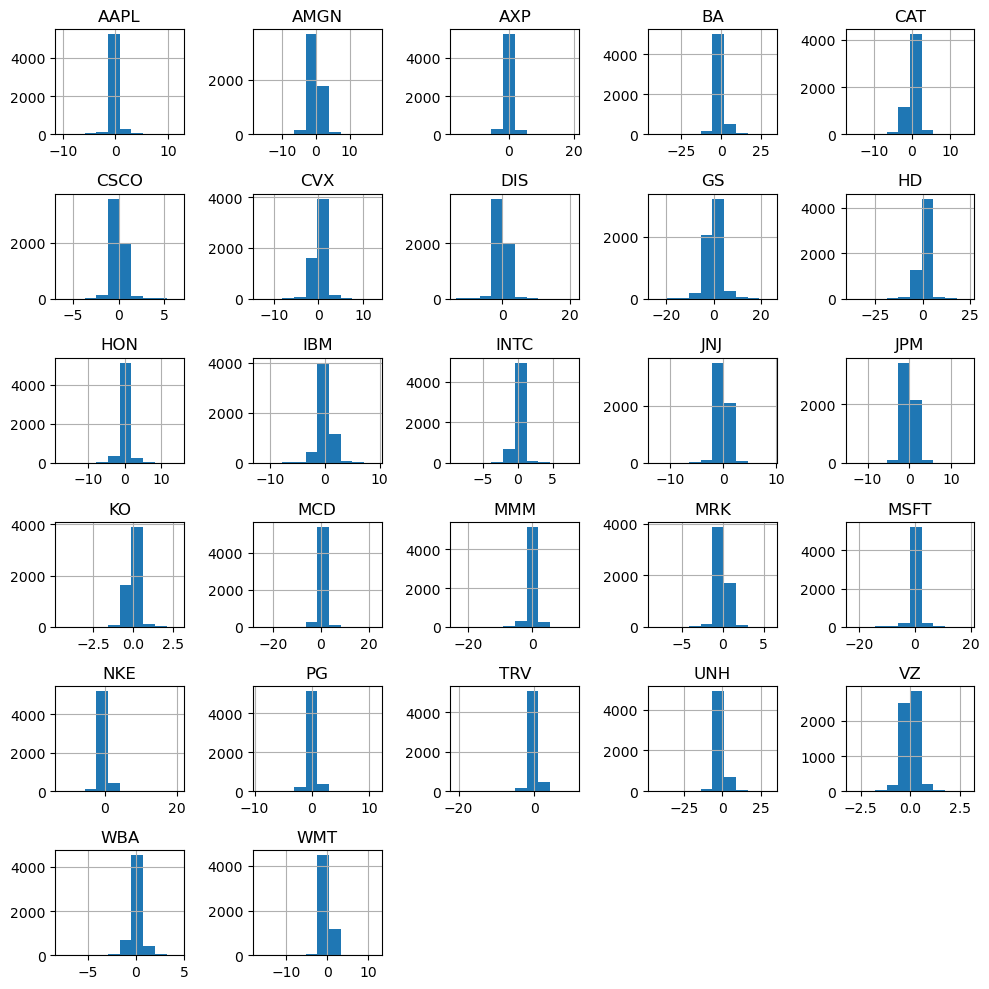

In [17]:
# Гистограмма столбца «log_returns».
log_returns.hist(figsize=(10,10))

# Отрегулируйте расстояние между подграфиками
plt.tight_layout()

# Результат
plt.show()

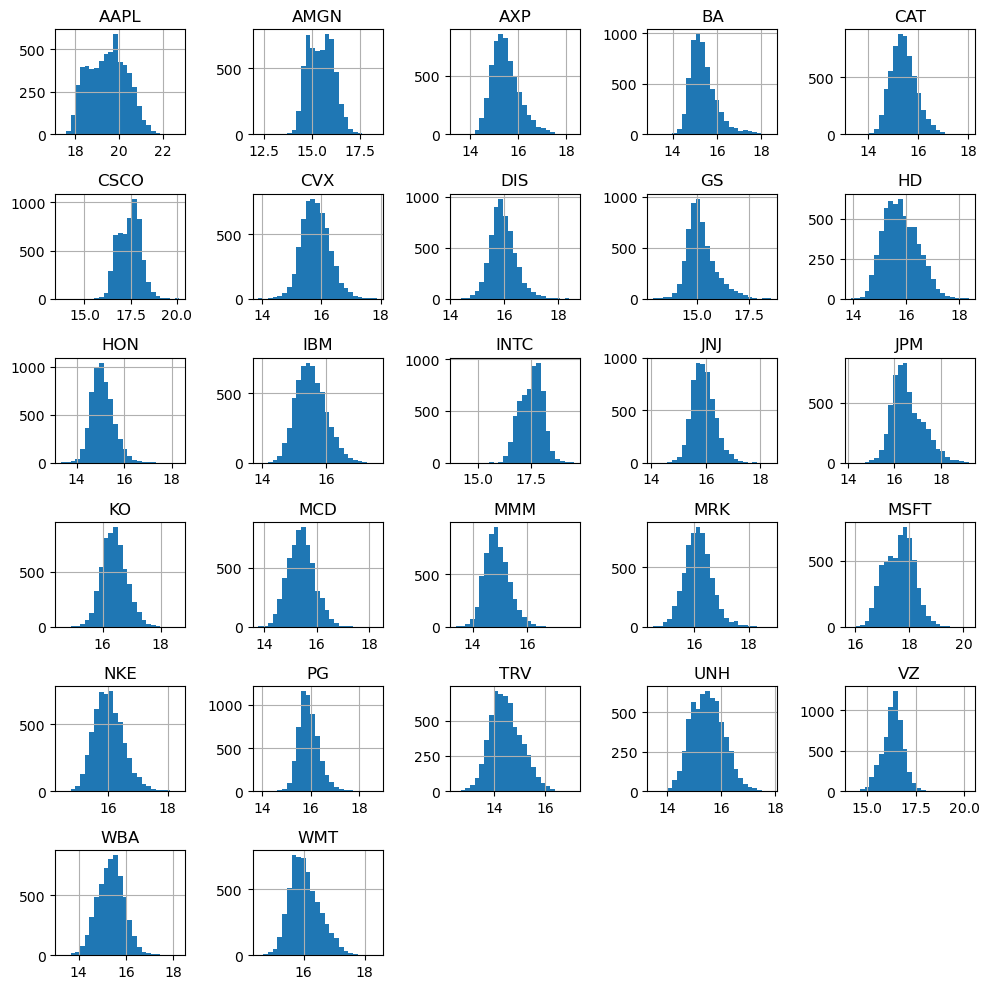

In [18]:
# Гистограмма столбца «Volume».
data_log["Volume"].hist(bins=25, figsize=(10,10))

# Отрегулируйте расстояние между подграфиками
plt.tight_layout()

# Результат
plt.show()

In [40]:
# Создаем пустой DataFrame для хранения результатов
results = pd.DataFrame(columns=['ADF Statistic', 'p-value', 'stationarity'], index=log_returns.columns)

# Перебираем каждый столбец и выполняем тест ADF
for col in log_returns.columns:
    res = adfuller(log_returns[col])
    results.loc[col] = [res[0], res[1], 'Stationary' if res[1] < 0.05 else 'Non-Stationary']
    
# ИтогТаким образом, если p-значение теста ADF меньше уровня значимости (0,05), то мы отвергнем нулевую гипотезу и сделаем вывод, что временной ряд определенно стационарен
print(results)

     ADF Statistic p-value stationarity
AAPL     -13.23192     0.0   Stationary
AMGN    -15.216256     0.0   Stationary
AXP     -15.717257     0.0   Stationary
BA        -13.9802     0.0   Stationary
CAT     -15.956299     0.0   Stationary
CSCO    -12.630427     0.0   Stationary
CVX     -15.378709     0.0   Stationary
DIS     -12.276803     0.0   Stationary
GS      -14.081973     0.0   Stationary
HD      -13.508395     0.0   Stationary
HON     -14.661245     0.0   Stationary
IBM     -17.751397     0.0   Stationary
INTC    -14.083781     0.0   Stationary
JNJ     -19.837905     0.0   Stationary
JPM     -12.717938     0.0   Stationary
KO      -16.251407     0.0   Stationary
MCD     -15.593808     0.0   Stationary
MMM     -15.279264     0.0   Stationary
MRK     -20.960303     0.0   Stationary
MSFT    -14.463306     0.0   Stationary
NKE     -12.567518     0.0   Stationary
PG      -16.969399     0.0   Stationary
TRV     -13.724463     0.0   Stationary
UNH     -16.350452     0.0   Stationary


Таким образом, так как p-значение теста ADF для логдоходностей меньше уровня значимости (0,05), то мы отвергнем нулевую гипотезу и сделаем вывод, что временной ряд определенно стационарен.

<Axes: >

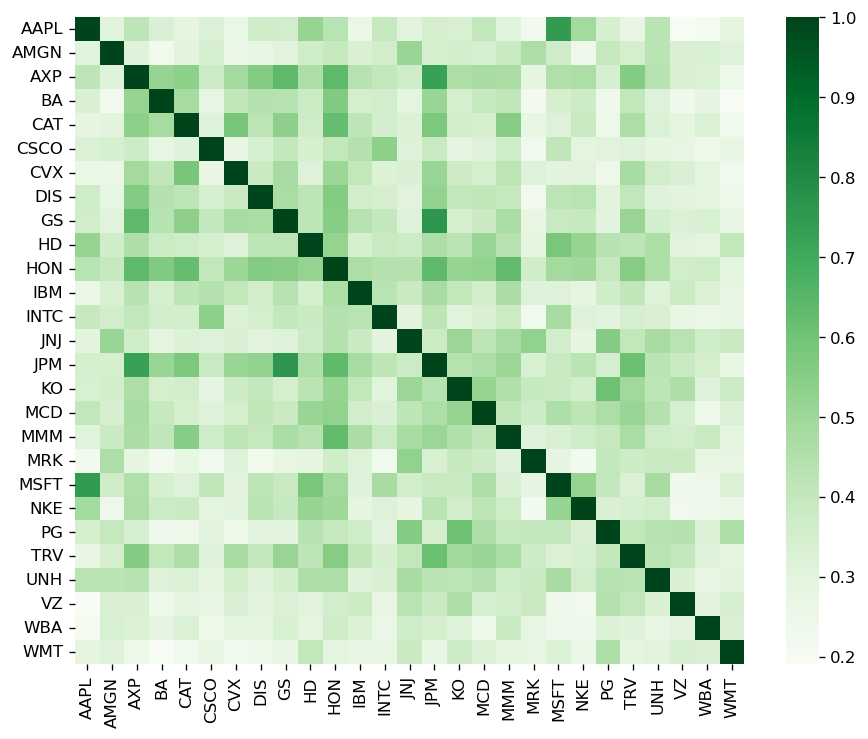

In [64]:
sns.heatmap(log_returns.corr(), cmap='Greens')

Проблема с sns.pairplot(). Он отказался работать, вычисления происходят примерно вечность, поэтому ограничимся гистограммами и heatmap.

Можно заметить, что большинство сильных корреляций приходится на компании одного сектора. Например The Goldman Sachs и J.P. Morgan, или же Apple и Microsoft.